## Course Code: DS4003
## Course Name: Principles and Techniques for Data Science
## Lab Session: 10 - Linear Regression

In [1]:
import numpy as np 
import pandas as pd 
import os

# Today's topics
* Simple Linear Regression 
* Multiple Linear Regression 
* Gradient Descent 

## Let's consider the following equaiton 

$y = f(X) = mX +b + \mathcal{N}(0, \epsilon)$ 

where ```X``` is a random variable, ```m``` is the slope, ```b``` is the intercept and ```y``` is the output of the function ```f```. 

## We will generate data using numpy 

In [2]:
X = np.linspace(0, 1, num=1000)
m = 2.7 
b = 1.0 
y = m * X + b + np.random.normal(loc=0.0, scale=0.2, size=(X.shape[0]))

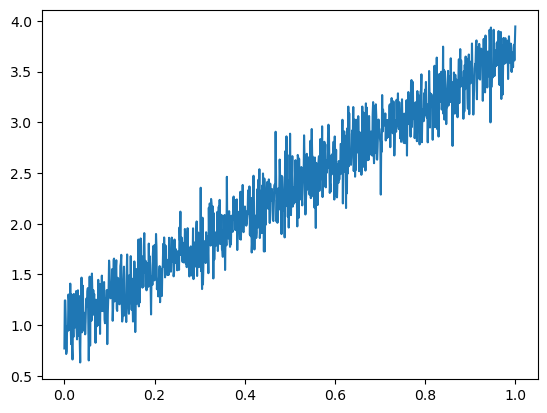

In [3]:
import matplotlib.pyplot as plt 
plt.plot(X, y)

# OLS solution 
the equation of Ordinary Least Squres will be

$OLS(X, Y) = \frac{1}{N}(Y - y)^2$

And an estimation of OLS solution will be: 

$\hat{b} = \bar{y} - \hat{m} \bar{X}$

$\hat{m} = \frac{\sum X_i (y_i - \bar{y})}{\sum X_i (X_i - \bar{X})}$

## Task: Solution from scratch 
implement the above equations below

In [4]:
# your code here


## Sklearn Solution 

In [5]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
print(model.intercept_, model.coef_)

[0.99066306] [[2.71148639]]


# Optional: OLS in PyTorch 

In [6]:
import torch 
X = torch.linspace(0, 1, 1000)
y = b + m * X + torch.normal(mean=0.0, std=0.02, size=X.size())

In [7]:
xbar = torch.mean(X) 
ybar = torch.mean(y)
m_cap = torch.sum(torch.multiply(X , (y - ybar))) / torch.sum(torch.multiply(X, (X - xbar)))
b_cap = ybar - m_cap * xbar 

In [8]:
print(b_cap.item(), m_cap.item())

0.998786211013794 2.7020654678344727


# Task: Solve the following equation using vectorized OLS from Scratch 
$y = \beta_0 + X_1\beta_1 + X_2 \beta_2 + X_3 \beta_3 + \mathcal{N(0, 0.02)}$

$\beta = (X^TX)^{-1}X^Ty$

$X = [1 \; X_1 \; X_2\; X_3]$

In [9]:
N = 100
e = np.random.normal(loc=0, scale=0.02, size=N)
X1 = np.random.uniform(-1, 1, size=N)
X2 = np.random.normal(loc=0, scale=1, size=N)
X3 = np.random.normal(loc=0, scale=0.5, size=N)
b0 = 11
b1 = 1.0 
b2 = 2.2 
b3 = 3.3
y = b0 + X1 * b1 + X2 * b2 + X3 * b3 + e


In [10]:
# your code here


# Gradient Descent 

We will use a very simple equation to experiment with Gradient Descent algorithm. 

$y = b + mx + \mathcal{N}(0, \sigma^2)$

In [12]:
X = np.random.uniform(-1, 1, size=100)
b = 2.0 
m = 3.0
e = np.random.normal(loc=0, scale=0.2, size=100)
y = b + m * X + e 

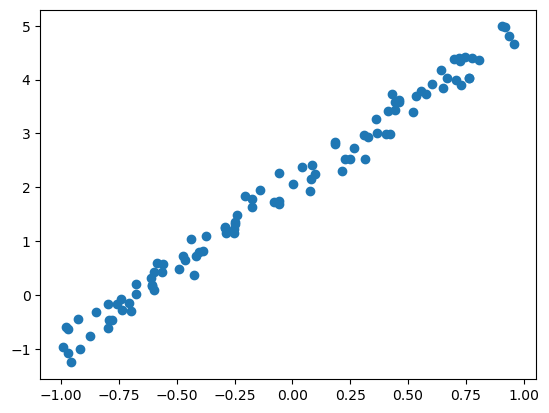

In [13]:
plt.scatter(X, y)

## Task: implement y = F(b, m, x)  = b + m * x 

In [14]:
def F(b, m, x): 
    # your code here 
    return NotImplemented

## Task: Implement Sum of Squared Error fuction 

In [15]:
def SSE(b, m, data, y): 
    """given the intercept b, slope m, data and noisy function value y, calculate the sum of squared error"""
    # your code here 
    return NotImplemented

## Gradient Descent Runner 

In [16]:
def run_gd(data,y, b0, m0, lr, n_iter): 
    b = b0
    m = m0 
    cost_list = list() 
    for i in range(n_iter): 
        cost = SSE(b, m, data, y)
        cost_list.append(cost)
        b, m = step(b, m, data, y, lr)
    return b, m, cost_list 

## Task: Derive the gradient for b and m from the SSE 

$e = \sum (Y_i - P_i)^2$ 

$\frac{de}{dm}= 2 \sum (Y_i - P_i) (-\frac{dP}{dm}) = 2 \sum (Y_i - P_i)(-\frac{d}{dm} (b + m \times x_i))$

$= 2 \sum (Y_i - P_i) (-x_i)$

$\frac{de}{db} = 2 \sum (Y_i - P_i) (-\frac{dP}{db}) = 2 \sum (Y_i - P_i)(-\frac{d}{db} (b + m \times x_i))$

$= 2 \sum (P_i - Y_i)$ 

## Task: Implement the Gradient Descent Step

Use the following equation for updating 

$b = b - learning\_rate * grad\_b$

$m = m - learning\_rate * grad\_m$

In [17]:
def step(b, m, data, y, lr): 
    """Given the intercept b, slope m, points data, noisy output y, and learning rate lr, update the intercept and slope according to gradient descent and return them"""
    # your code here
    return NotImplemented

### Run the code below after implemting your step function

In [21]:
b, m, costs = run_gd(X, y, 0,1,1e-3, 1000)

In [22]:
plt.plot(costs)

In [20]:
print(b, m)

2.0 3.0


# Gradient Descent with Sklearn 
Alternatively, we can also implement Gradient Descent with the sklearn library

In [23]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=1000, tol=1e-3)

In [24]:
model.fit(X.reshape(-1, 1), y)

SGDRegressor()

In [25]:
print(model.intercept_, model.coef_)

[2.02759338] [2.76245412]


# $R^2$ Score

## Once we have computed a regression model, we can evaluate the goodness of the fit. The most common approach employed is the $R^2$ score

## Task: Implement $R^2$ score from sklearn, take pred as the predictions and the ground truth as y

In [28]:

pred = model.predict(X.reshape(-1, 1))

In [26]:
# Your code here


# Optional: SGD with PyTorch 

In [29]:
import torch 
import torch.nn as nn 
class SimpleRegressor(nn.Module): 
    def __init__(self, n_inputs): 
        super().__init__() 
        self.m = nn.Parameter(torch.randn((n_inputs, 1), dtype=torch.float32))
        self.b = nn.Parameter(torch.randn(1, dtype=torch.float32))
    def forward(self, x): 
        return self.b + x @ self.m 
    def print_params(self): 
        print(f'Intercept: {self.b.item()}')
        print(f'Coefficients: {self.m.detach().numpy()}')

In [30]:
from torch.utils.data import Dataset, DataLoader 

In [31]:
class SimpleDataset(Dataset): 
    def __init__(self, X, y): 
        self.X = X 
        self.y = y 
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, index): 
        data = self.X[index] 
        label = self.y[index]
        
        return data.reshape(-1), label 

In [32]:
dataset = SimpleDataset(X, y)

In [33]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [34]:
model  = SimpleRegressor(1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

In [35]:
from tqdm.auto import tqdm 

def train(n_epoch, data_loader, model, loss_function, optimizer):
    pbar = tqdm(total=n_epoch)
    loss_list = list() 
    for epoch in range(n_epoch):
        num_batches = len(data_loader)
        total_loss = 0
        best_loss = np.inf 
        model.train()
        pbar.set_description(f'Epoch: {epoch}')
        for X, y in data_loader:
            output = model(X.float())
            loss = loss_function(output.squeeze(), y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if loss.item() < best_loss: 
                best_loss = loss.item()
                torch.save(model.state_dict(), 'best_model.pt')
            total_loss += loss.item()
            pbar.set_postfix({'Loss': loss.item()})
        avg_loss = total_loss / num_batches
        pbar.update()
        loss_list.append(avg_loss)
    pbar.close()
    return loss_list 

In [36]:
losses = train(100, dataloader, model, loss_fn, optimizer)

  0%|          | 0/100 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [37]:
model.print_params()

Intercept: 2.0363779067993164
Coefficients: [[2.8649693]]


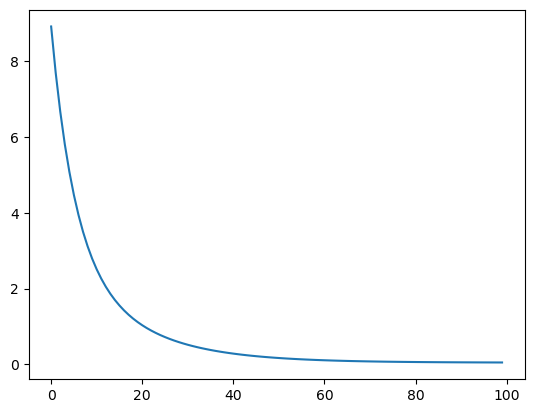

In [38]:
plt.plot(losses)

# Optional: Apply data with multiple features with the SGD PyTorch model